<a href="https://colab.research.google.com/github/SampMark/Computational-Thinking/blob/main/Exploratory_Data_Analysis_CoasterDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ciência de Dados aplicada ao processamento de dados sobre Montanhas-Russas**

A ciência de dados utiliza ferramentas matemáticas e estatísticas para explorar, analisar e extrair conhecimento a partir de conjuntos de dados. Neste laboratório, o objetivo é realizar o processamento e a limpeza dos dados de um _dataset_ sobre montanhas-russas, garantindo qualidade e confiabilidade na  Análise Exploratória de Dados (EDA).

## **Sobre o Dataset**

O _dataset_ em questão reúne informações detalhadas sobre montanhas-russas ao redor do mundo, incluindo:

- **Identificação:** nome, localização e ano de inauguração.
- **Status:** se está ou não em operação.
- **Características estruturais:** tipo (ex.: Steel, Wooden, Hybrid) e medidas físicas (altura, velocidade, comprimento, número de inversões, força G).

É possível acessar o ["Roller Coaster Database"](https://www.kaggle.com/datasets/robikscube/rollercoaster-database) de Rob Mulla, que contém o arquivo `coaster_db.csv`, diretamente na página do Kaggle. Todavia, este _dataset_ apresenta diversos problemas de preenchimento, exigindo um esforço maior na sua organização. A seguir, apresentamos o fluxo de trabalho e os procedimentos básicos que todo cientista de dados deve considerar.


## **Fluxo de Trabalho**: ETL e Análise Exploratória

O processo ETL (Extração, Transformação e Carga dos dados) é fundamental em projetos de ciência de dados e análise, pois garante que os dados coletados de uma ou mais fontes sejam integrados, limpos e estruturados para análise. Abaixo, detalhamos cada uma das fases:

---

### 1. **Extração ou Importação dos Dados** (*Extract*)

Nesta etapa, os dados são coletados de fontes variadas – como bancos de dados relacionais, arquivos CSV, APIs, sistemas legados ou mesmo fontes web. O objetivo é reunir todos os dados brutos, independentemente do seu formato ou origem. É importante garantir que o processo de extração seja eficiente e que os dados sejam capturados sem perdas ou distorções.

**Neste laboratório**, o carregamento do _dataset_ em CSV foi realizado utilizando a biblioteca Pandas, a partir do meu repositório no GitHub.

### 2. **Transformação dos Dados** (_Transform_)

Após a extração, os dados brutos devem passar por um processo de inspeção e transformação para serem limpos e adequadamente preparados para a análise. Esta etapa envolve:

#### **Limpeza dos Dados**
A limpeza dos dados tem como objetivo tornar o DataFrame coerente e confiável para a análise exploratória. Os principais procedimentos incluem:

- **Eliminação de colunas irrelevantes ou redundantes:** Remove dados que não agregam valor à análise.
- **Uniformização dos tipos de dados:** Padroniza colunas numéricas, datas e outras variáveis específicas.
- **Tratamento de dados faltantes:**
  - Remoção de linhas ou colunas com muitos valores ausentes.
  - Imputação por média, mediana ou moda para preservar o tamanho do conjunto.
  - Interpolação, especialmente em séries temporais.
  - Utilização de métodos avançados, como MICE (_Multiple Imputation by Chained Equations_).
- **Identificação e tratamento de outliers:** Uso de estatísticas como o IQR e ferramentas visuais (boxplot) para detectar valores extremos.

#### **Integração**
Combinação de dados provenientes de diferentes fontes, garantindo consistência e coerência entre eles.

#### **Enriquecimento**
Adição de novas informações derivadas dos dados originais, como cálculos de métricas ou agregações.

#### **Normalização**
Ajuste dos dados para que todas as variáveis estejam em escalas comparáveis, facilitando análises estatísticas e aplicação de algoritmos de _machine learning_.

- **Motivação:** Em modelos estatísticos e de machine learning, variáveis em escalas diferentes podem distorcer os resultados.
- **Técnicas comuns:**
  - **Padronização (Z-score):** Ajusta os dados para que tenham média 0 e desvio padrão 1.
  - **Min-Max Scaling:** Reescala os valores para um intervalo pré-definido (geralmente [0, 1]).

### 3. **Carga dos Dados** (_Load_)

Quando se trabalha com grandes volumes de dados, a última etapa consiste em carregar os dados transformados em um sistema de destino, como um data warehouse, banco de dados ou uma plataforma de análise. Este ambiente organizado possibilita consultas eficientes, análises robustas e a aplicação de modelos preditivos. A carga pode ser feita de forma incremental ou em lote, dependendo do volume e da dinâmica dos dados.

**Nota:** Esta etapa não se aplica neste laboratório, pois estamos focados apenas na análise exploratória.

---

### 4. **Análise Exploratória de Dados (EDA)**

A análise exploratória de dados visa compreender as características principais do _dataset_ e identificar padrões, tendências e anomalias. As técnicas utilizadas incluem:

- **Estatísticas Descritivas:** Cálculo de métricas (média, mediana, desvio padrão, mínimo e máximo) para compreender os atributos quantitativos.
- **Visualizações:**
  - **Histogramas e Boxplots:** Para visualizar a distribuição de variáveis, como altura, velocidade e ano de inauguração.
  - **Gráficos de Dispersão:** Para investigar relações entre diferentes atributos, como a correlação entre altura e velocidade.
  - **Mapas Geográficos:** Utilização de ferramentas interativas (por exemplo, Plotly) para representar a distribuição espacial dos dados.

---

## **Considerações finais**

Este fluxo de trabalho proporciona uma abordagem sistemática, desde a importação e inspeção dos dados até a limpeza, normalização e análise exploratória. A aplicação desses procedimentos é fundamental para obter insights precisos e confiáveis, servindo como base para análises mais avançadas e para a construção de modelos preditivos.

---



In [2]:
# @title Importando as bibliotecas
import re
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import plotly.express as px

In [29]:
# @title Importando e exibindo o Roller Coaster Database `coaster_db.csv`
df = pd.read_csv("https://raw.githubusercontent.com/SampMark/files/refs/heads/main/coaster_db.csv")

print(f"O DataFrame 'coaster' tem {df.shape[0]} linhas e {df.shape[1]} colunas.")
df.head(10)

O DataFrame 'coaster' tem 1087 linhas e 56 colunas.


,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
5,Cannon Coaster,NaN,NaN,Coney Island,Removed,1902,Wood,George Francis Meyer,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,40.0,ft,NaN,0,NaN
6,Leap-The-Dips,"1,452 ft (443 m)",10 mph (16 km/h),Lakemont Park,Operating,1902,Wood – Side friction,Federal Construction Company,NaN,NaN,...,10 mph,16 km/h,10.0,mph,10.0,41.0,ft,NaN,0,NaN
7,Figure Eight (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
8,Drop the Dip,NaN,NaN,Coney Island,Removed,"June 6, 1907",Other,Arthur Jarvis,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,60.0,ft,NaN,0,NaN
9,Scenic Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [30]:
# @title Listando os nomes das colunas
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [5]:
# @title Explorando os tipos de dados das colunas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [6]:
# @title Contagem de dados faltantes por colunas
print(df.isnull().sum())

coaster_name                        0
Length                            134
Speed                             150
Location                            0
Status                            213
Opening date                      250
Type                                0
Manufacturer                       59
Height restriction                256
Model                             343
Height                            122
Inversions                        155
Lift/launch system                292
Cost                              705
Trains                            369
Park section                      600
Duration                          322
Capacity                          512
G-force                           725
Designer                          509
Max vertical angle                730
Drop                              593
Soft opening date                 991
Fast Lane available              1018
Replaced                          914
Track layout                      752
Fastrack ava

In [7]:
# @title Exibindo colunas com a palavra 'speed'
speed_columns = [col for col in df.columns if 'speed' in col.lower()]
df[speed_columns]

,Speed,speed1,speed2,speed1_value,speed1_unit,speed_mph
0,6 mph (9.7 km/h),6 mph,9.7 km/h,6.0,mph,6.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
1082,53 mph (85 km/h),53 mph,85 km/h,53.0,mph,53.0
1083,73 mph (117 km/h),73 mph,117 km/h,73.0,mph,73.0
1084,59.3[1] mph (95.4 km/h),59.3 mph,95.4 km/h,59.3,mph,59.3
1085,34 mph (55 km/h),34 mph,55 km/h,34.0,mph,34.0


In [8]:
# @title Exibindo colunas com a palavra 'height'
height_columns = [col for col in df.columns if 'height' in col.lower()]
df[height_columns]

,Height restriction,Height,height_value,height_unit,height_ft
0,NaN,50 ft (15 m),50.0,ft,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1082,55 in (140 cm),111 ft (34 m),111.0,ft,NaN
1083,NaN,178 ft (54 m),178.0,ft,NaN
1084,4[2] ft (122 cm),78.1 ft (23.8 m),78.1,ft,NaN
1085,NaN,112 ft (34 m),112.0,ft,NaN


In [9]:
# @title ⚠️Explorando melhor as colunas 'Speed' e 'Height'
df[['coaster_name', 'Speed', 'Height']].head(50)

,coaster_name,Speed,Height
0,Switchback Railway,6 mph (9.7 km/h),50 ft (15 m)
1,Flip Flap Railway,NaN,NaN
2,Switchback Railway (Euclid Beach Park),NaN,NaN
3,Loop the Loop (Coney Island),NaN,NaN
4,Loop the Loop (Young's Pier),NaN,NaN
5,Cannon Coaster,NaN,40 ft (12 m)
6,Leap-The-Dips,10 mph (16 km/h),41 ft (12 m)
7,Figure Eight (Euclid Beach Park),NaN,NaN
8,Drop the Dip,NaN,60 ft (18 m)
9,Scenic Railway (Euclid Beach Park),NaN,NaN


### ⚠️ Ops... 😕 Há equívocos de preenchimento, por exemplo em:

- 15 The Great Scenic Railway	967 m (3,173 ft);	60 km/h (37 mph) 😬
- 25 RRoller Coaster (Lagoon)	762 m (2,500 ft); 😬	45 mph (72 km/h)

In [10]:
df.iloc[13:18]

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
13,Racer (1910 roller coaster),"4,500 ft (1,400 m)",40 mph (64 km/h),Kennywood,Operating,1927,Wood – Racing,Charlie Mach,46 in (117 cm),Racing,...,40 mph,64 km/h,40.0,mph,40.0,72.5,ft,NaN,0,NaN
14,Derby Racer,NaN,NaN,Revere Beach,Removed,1911,Wood – Racing,Fred W. Pearce,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
15,The Great Scenic Railway,"967 m (3,173 ft)",60 km/h (37 mph),Luna Park Melbourne,Operating,December 1912,Wood,LaMarcus Thompson,100 cm (3 ft 3 in),NaN,...,60 km/h,37 mph,60.0,km/h,37.3,16.0,m,52.5,0,NaN
16,Zippin Pippin,"2,865 ft (873 m)",40 mph (64 km/h),Other,NaN,NaN,Wood,The Gravity Group,48 in (122 cm),Wooden Coaster,...,40 mph,64 km/h,40.0,mph,40.0,70.0,ft,NaN,0,NaN
17,Racing Coaster,NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [11]:
df.iloc[23:28]

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
23,Jack Rabbit (Seabreeze),"2,130 ft (650 m)",42 mph (68 km/h),Seabreeze Amusement Park,Operating,1920,Wood,Harry C. Baker,48 in (122 cm),NaN,...,42 mph,68 km/h,42.0,mph,42.0,75.0,ft,NaN,0,NaN
24,Scenic Railway (roller coaster),"3,000 ft (910 m)",35 mph (56 km/h),Dreamland Margate,Operating,3 July 1920,Wood,NaN,NaN,Scenic Railway,...,35 mph,56 km/h,35.0,mph,35.0,40.0,ft,NaN,0,NaN
25,Roller Coaster (Lagoon),"762 m (2,500 ft)",45 mph (72 km/h),Lagoon Amusement Park,Operating,July 15 1921,Wood,NaN,46 in (117 cm),NaN,...,45 mph,72 km/h,45.0,mph,45.0,18.9,m,62.0,0,NaN
26,Big Dipper (Blackpool Pleasure Beach),"3,300 ft (1,000 m)",40 mph (64 km/h),Blackpool Pleasure Beach,Operating,23 August 1923,Wood – Out and back,William Strickler,46 in (117 cm),Wooden Out and back coaster,...,40 mph,64 km/h,40.0,mph,40.0,65.0,ft,NaN,0,3.7
27,Wild Cat (Hersheypark),"2,331 ft (710 m)",NaN,Hersheypark,Removed,"June 16, 1923",Wood,Philadelphia Toboggan Coasters,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


# **Extraindo os dados de 'Speed' e 'Height'**

---



In [12]:
def extract_height_values(df):
    """
    Extrai valores numéricos de altura em pés e metros da coluna 'Height'.
    Suporta a inversão de valores, por exemplo:
    - '50 ft (15 m)'
    - '15 m (50 ft)'

    Parâmetros:
    df (DataFrame): DataFrame contendo a coluna 'Height'

    Retorna:
    DataFrame: DataFrame original com duas novas colunas 'Height_ft' e 'Height_mt'
    """

    # Regex para capturar dois valores numéricos (val1, val2) e duas unidades (unit1, unit2),
    # aceitando ft ou m em qualquer ordem.
    pattern = (
        r'(?P<val1>\d+\.?\d*)\s*(?P<unit1>ft|m)\s*'
        r'\(\s*(?P<val2>\d+\.?\d*)\s*(?P<unit2>ft|m)\)'
    )

    # Extrai val1, unit1, val2, unit2
    extracted = df['Height'].str.extract(pattern)

    # Converte val1 e val2 para float (onde houver correspondência)
    extracted['val1'] = pd.to_numeric(extracted['val1'], errors='coerce')
    extracted['val2'] = pd.to_numeric(extracted['val2'], errors='coerce')

    # Função interna para decidir qual valor é em pés e qual é em metros
    def assign_heights(row):
        # Se unit1 == 'ft', então val1 é pés e val2 é metros; caso contrário, invertemos
        if row['unit1'] == 'ft':
            height_ft = row['val1']
            height_mt = row['val2']
        else:
            height_ft = row['val2']
            height_mt = row['val1']
        return pd.Series([height_ft, height_mt], index=['Height_ft', 'Height_mt'])

    # Aplica a lógica a cada linha
    df[['Height_ft', 'Height_mt']] = extracted.apply(assign_heights, axis=1)

    return df

In [13]:
# @title Verificando novamente as colunas 'Height', 'Height_ft' e 'Height_mt' de 'extract_height_values'✅
extract_height_values(df)[['Height', 'Height_ft', 'Height_mt']].head(50)

,Height,Height_ft,Height_mt
0,50 ft (15 m),50.00,15.00
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,40 ft (12 m),40.00,12.00
6,41 ft (12 m),41.00,12.00
7,NaN,NaN,NaN
8,60 ft (18 m),60.00,18.00
9,NaN,NaN,NaN


In [14]:
def extract_speed_values(df):
    """
    Extrai valores numéricos de velocidade em mph e km/h da coluna 'Speed'.
    Suporta a inversão de valores, por exemplo:
    - '40 mph (64 km/h)'
    - '64 km/h (40 mph)'

    Parâmetros:
    df (DataFrame): DataFrame contendo a coluna 'Speed'

    Retorna:
    DataFrame: DataFrame original com duas novas colunas 'Speed_mph' e 'Speed_km/h'
    """

    # Regex para capturar dois valores numéricos (val1, val2) e duas unidades (unit1, unit2),
    # aceitando mph ou km/h em qualquer ordem.
    pattern = (
        r'(?P<val1>\d+\.?\d*)\s*(?P<unit1>mph|km/h)\s*'
        r'\(\s*(?P<val2>\d+\.?\d*)\s*(?P<unit2>mph|km/h)\)'
    )

    # Extrai val1, unit1, val2, unit2
    extracted = df['Speed'].str.extract(pattern)

    # Converte val1 e val2 para float (onde houver correspondência)
    extracted['val1'] = pd.to_numeric(extracted['val1'], errors='coerce')
    extracted['val2'] = pd.to_numeric(extracted['val2'], errors='coerce')

    # Função interna para decidir qual valor é mph e qual é km/h
    def assign_speeds(row):
        # Se unit1 == 'mph', então val1 é mph e val2 é km/h; caso contrário, invertemos
        if row['unit1'] == 'mph':
            speed_mph = row['val1']
            speed_km_h = row['val2']
        else:
            speed_mph = row['val2']
            speed_km_h = row['val1']
        return pd.Series([speed_mph, speed_km_h], index=['Speed_mph', 'Speed_km/h'])

    # Aplica a lógica a cada linha
    df[['Speed_mph', 'Speed_km/h']] = extracted.apply(assign_speeds, axis=1)

    return df

In [15]:
# @title Verificando novamente as colunas 'Speed', 'Speed_mph' e 'Speed_km/h' de 'extract_speed_values'✅
extract_speed_values(df)[['Speed', 'Speed_mph', 'Speed_km/h']].head(50)

,Speed,Speed_mph,Speed_km/h
0,6 mph (9.7 km/h),6.0,9.7
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
5,NaN,NaN,NaN
6,10 mph (16 km/h),10.0,16.0
7,NaN,NaN,NaN
8,NaN,NaN,NaN
9,NaN,NaN,NaN


In [16]:
# @title Exibindo valores categóricos de 'Status'😕
print(df['Status'].unique())

['Removed' 'Closed' 'Operating' nan 'Not Currently Operating'
 'In Production' 'Discontinued'
 'closed for maintenance as of july 30 no reopening date known'
 'Closed in 2021' 'SBNO December 2019' 'Under construction'
 'Temporarily Closed' 'SBNO (Standing But Not Operating)'
 'Temporarily closed'
 'Chapter 7 bankruptcy; rides dismantled and sold; property sold'
 'Under Maintenance']


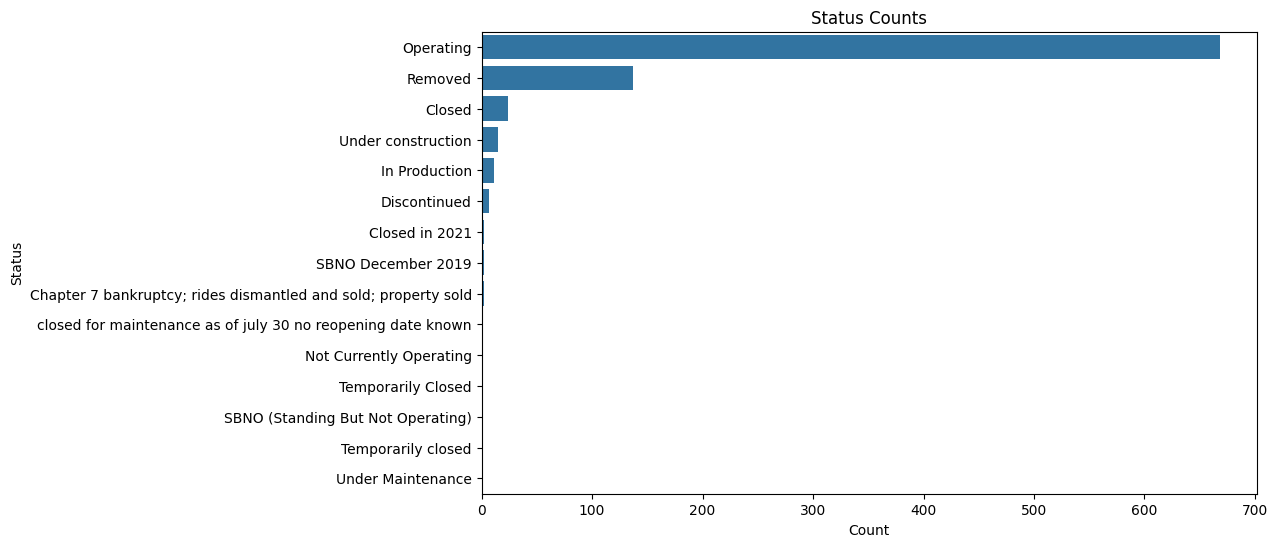

In [17]:
status_counts = df['Status'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.values, y=status_counts.index, orient='h')
plt.xlabel('Count')
plt.ylabel('Status')
plt.title('Status Counts')
plt.show()

In [18]:
# @title Criar coluna booleana 'Operating' baseada no 'Status'
df['Operating'] = df['Status'].str.strip().eq('Operating')
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean,Height_ft,Height_mt,Speed_mph,Speed_km/h,Operating
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,50.0,ft,NaN,0,2.9,50.0,15.0,6.0,9.7,False
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,1,12.0,NaN,NaN,NaN,NaN,False
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,False
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,False
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,False


In [19]:
# @title **Selecionando das colunas relevantes para análise exploratória de dados**✅

# Converta 'year_introduced' para object
df['year_introduced'] = df['year_introduced'].astype('object')

cols_keep = [
    'year_introduced', 'coaster_name', 'Status', 'Operating', 'Type_Main', 'Manufacturer', 'Location', 'latitude', 'longitude', 'Gforce_clean',
    'Speed_mph', 'Speed_km/h', 'Height_ft', 'Height_mt'
]
coaster = df[cols_keep]
coaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_introduced  1087 non-null   object 
 1   coaster_name     1087 non-null   object 
 2   Status           874 non-null    object 
 3   Operating        1087 non-null   bool   
 4   Type_Main        1087 non-null   object 
 5   Manufacturer     1028 non-null   object 
 6   Location         1087 non-null   object 
 7   latitude         812 non-null    float64
 8   longitude        812 non-null    float64
 9   Gforce_clean     362 non-null    float64
 10  Speed_mph        930 non-null    float64
 11  Speed_km/h       930 non-null    float64
 12  Height_ft        955 non-null    float64
 13  Height_mt        955 non-null    float64
dtypes: bool(1), float64(7), object(6)
memory usage: 111.6+ KB


In [20]:
# @title Agora tudo parece ok!✅
coaster.head(10)

,year_introduced,coaster_name,Status,Operating,Type_Main,Manufacturer,Location,latitude,longitude,Gforce_clean,Speed_mph,Speed_km/h,Height_ft,Height_mt
0,1884,Switchback Railway,Removed,False,Wood,LaMarcus Adna Thompson,Coney Island,40.5740,-73.9780,2.9,6.0,9.7,50.0,15.0
1,1895,Flip Flap Railway,Removed,False,Wood,Lina Beecher,Sea Lion Park,40.5780,-73.9790,12.0,NaN,NaN,NaN,NaN
2,1896,Switchback Railway (Euclid Beach Park),Closed,False,Other,NaN,"Cleveland, Ohio, United States",41.5800,-81.5700,NaN,NaN,NaN,NaN,NaN
3,1901,Loop the Loop (Coney Island),Removed,False,Steel,Edwin Prescott,Other,40.5745,-73.9780,NaN,NaN,NaN,NaN,NaN
4,1901,Loop the Loop (Young's Pier),Removed,False,Steel,Edwin Prescott,Other,39.3538,-74.4342,NaN,NaN,NaN,NaN,NaN
5,1902,Cannon Coaster,Removed,False,Wood,George Francis Meyer,Coney Island,40.5750,-73.9800,NaN,NaN,NaN,40.0,12.0
6,1902,Leap-The-Dips,Operating,True,Wood,Federal Construction Company,Lakemont Park,NaN,NaN,NaN,10.0,16.0,41.0,12.0
7,1904,Figure Eight (Euclid Beach Park),Closed,False,Other,NaN,"Cleveland, Ohio, United States",41.5800,-81.5700,NaN,NaN,NaN,NaN,NaN
8,1907,Drop the Dip,Removed,False,Other,Arthur Jarvis,Coney Island,40.5744,-73.9786,NaN,NaN,NaN,60.0,18.0
9,1907,Scenic Railway (Euclid Beach Park),Closed,False,Other,NaN,"Cleveland, Ohio, United States",41.5800,-81.5700,NaN,NaN,NaN,NaN,NaN


In [21]:
# @title **Análise Estatística Descritiva**
coaster.describe()

,latitude,longitude,Gforce_clean,Speed_mph,Speed_km/h,Height_ft,Height_mt
count,812.000000,812.000000,362.000000,930.000000,930.000000,955.000000,955.000000
mean,38.373484,-41.595373,3.824006,48.622161,78.170473,98.091518,29.897361
std,15.516596,72.285227,0.989998,16.702499,26.870289,57.546033,17.561435
min,-48.261700,-123.035700,0.800000,5.000000,8.000000,8.000000,2.400000
25%,35.031050,-84.552200,3.400000,37.000000,60.000000,56.000000,17.000000
50%,40.289800,-76.653600,4.000000,50.000000,80.000000,92.000000,28.000000
75%,44.799600,2.778100,4.500000,58.000000,93.000000,120.000000,37.000000
max,63.230900,153.426500,12.000000,149.100000,240.000000,456.000000,139.000000


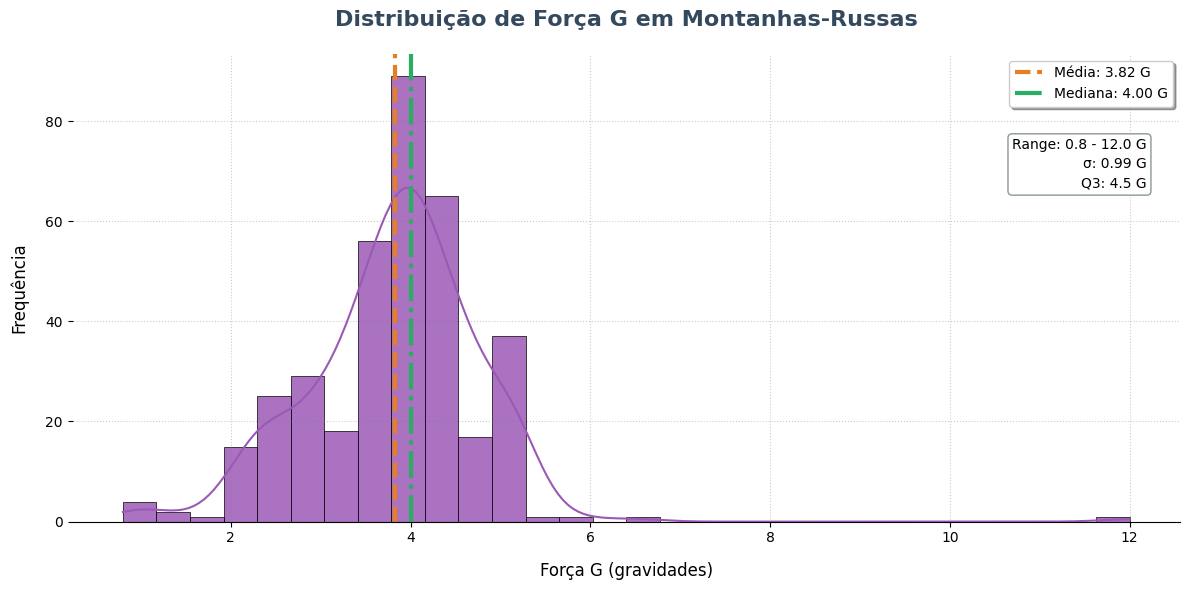

In [22]:
# @title **Distribuição de Força G em Montanhas-Russas**
plt.figure(figsize=(12, 6))

# Histograma com KDE
ax = sns.histplot(coaster["Gforce_clean"], bins=30, color='#9b59b6',
                 edgecolor='black', alpha=0.85, kde=True,
                 line_kws={'linewidth': 1.5, 'color': '#2c3e50'},
                 linewidth=0.5)

# Linhas de referência estatística
mean_gforce = coaster["Gforce_clean"].mean()
median_gforce = coaster["Gforce_clean"].median()

ax.axvline(mean_gforce, color='#e67e22', ls='--', lw=3,
          label=f'Média: {mean_gforce:.2f} G')
ax.axvline(median_gforce, color='#27ae60', ls='-.', lw=3,
          label=f'Mediana: {median_gforce:.2f} G')

# Customização avançada
ax.set_title('Distribuição de Força G em Montanhas-Russas',
            fontsize=16, pad=20, fontweight='bold', color='#34495e')
ax.set_xlabel('Força G (gravidades)', fontsize=12, labelpad=12)
ax.set_ylabel('Frequência', fontsize=12, labelpad=12)
ax.grid(True, linestyle=':', color='gray', alpha=0.4)

# Bloco informativo
stats_text = (f"Range: {coaster['Gforce_clean'].min():.1f} - {coaster['Gforce_clean'].max():.1f} G\n"
             f"σ: {coaster['Gforce_clean'].std():.2f} G\n"
             f"Q3: {coaster['Gforce_clean'].quantile(0.75):.1f} G")
ax.text(0.97, 0.82, stats_text, transform=ax.transAxes,
       ha='right', va='top', fontsize=10, linespacing=1.5,
       bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='#7f8c8d'))

# Elementos estéticos
ax.legend(loc='upper right', frameon=True, shadow=True)
sns.despine(left=True, right=True, top=True)
plt.tight_layout()
plt.show()

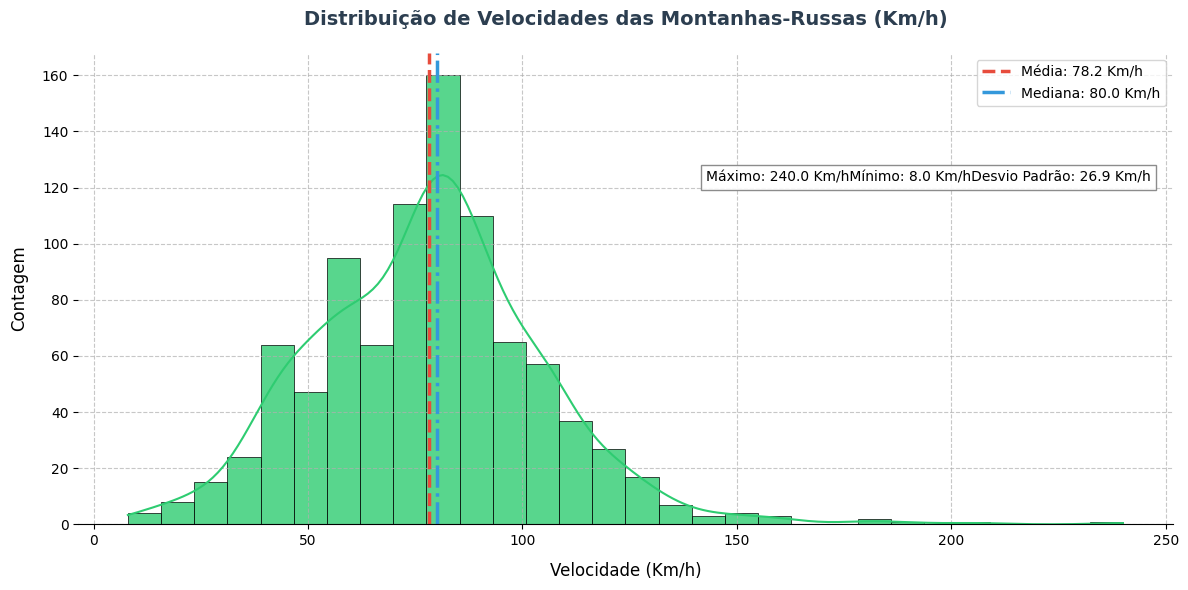

In [23]:
# @title **Distribuição de Velocidades das Montanhas-Russas**
plt.figure(figsize=(12, 6))

# Histograma com KDE
ax = sns.histplot(coaster["Speed_km/h"], bins=30, color='#2ecc71',
                 edgecolor='black', alpha=0.8, kde=True,
                 line_kws={'lw': 1.5, 'color': '#34495e'},
                 linewidth=0.5)

# Linhas de média e mediana
mean_speed = coaster["Speed_km/h"].mean()
median_speed = coaster["Speed_km/h"].median()

ax.axvline(mean_speed, color='#e74c3c', ls='--', lw=2.5,
          label=f'Média: {mean_speed:.1f} Km/h')
ax.axvline(median_speed, color='#3498db', ls='-.', lw=2.5,
          label=f'Mediana: {median_speed:.1f} Km/h')

# Customização
ax.set_title('Distribuição de Velocidades das Montanhas-Russas (Km/h)',
            fontsize=14, pad=20, fontweight='bold', color='#2c3e50')
ax.set_xlabel('Velocidade (Km/h)', fontsize=12, labelpad=10)
ax.set_ylabel('Contagem', fontsize=12, labelpad=10)
ax.grid(True, linestyle='--', alpha=0.7)

# Anotações estatísticas
stats_text = (f"Máximo: {coaster['Speed_km/h'].max():.1f} Km/h"
             f"Mínimo: {coaster['Speed_km/h'].min():.1f} Km/h"
             f"Desvio Padrão: {coaster['Speed_km/h'].std():.1f} Km/h")
ax.text(0.98, 0.75, stats_text, transform=ax.transAxes,
       ha='right', va='top', fontsize=10,
       bbox=dict(facecolor='white', alpha=0.9, edgecolor='gray'))

# Legendas e ajustes finais
ax.legend(loc='upper right', frameon=True)
sns.despine(left=True)
plt.tight_layout()
plt.show()

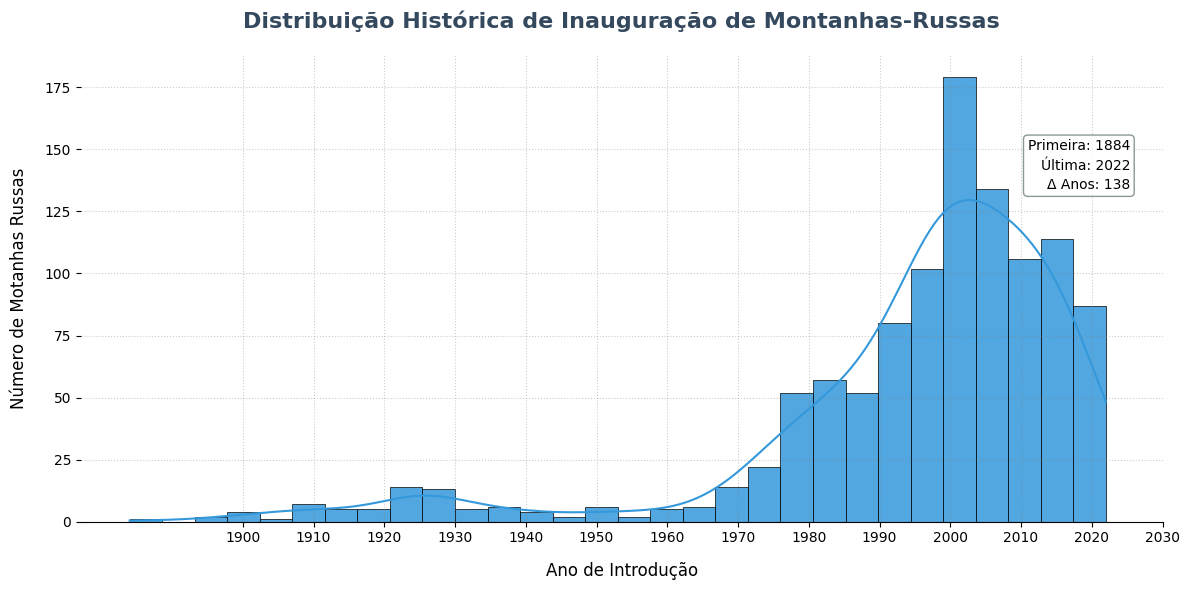

In [24]:
plt.figure(figsize=(12, 6))

# Histograma com densidade e estilo aprimorado
ax = sns.histplot(coaster["year_introduced"], bins=30, color='#3498db',
                 edgecolor='black', alpha=0.85, kde=True,
                 line_kws={'linewidth': 1.5, 'color': '#2c3e50'},
                 linewidth=0.5)

# Linhas de referência temporal
mean_year = coaster["year_introduced"].mean()
median_year = coaster["year_introduced"].median()

# ax.axvline(mean_year, color='#e74c3c', ls='--', lw=3,
#          label=f'Média: {mean_year:.1f}')
# ax.axvline(median_year, color='#2ecc71', ls='-.', lw=3,
#          label=f'Mediana: {median_year:.0f}')

# Customização
ax.set_title('Distribuição Histórica de Inauguração de Montanhas-Russas',
            fontsize=16, pad=20, fontweight='bold', color='#34495e')
ax.set_xlabel('Ano de Introdução', fontsize=12, labelpad=12)
ax.set_ylabel('Número de Motanhas Russas', fontsize=12, labelpad=12)
ax.grid(True, linestyle=':', color='gray', alpha=0.4)

# Bloco informativo temporal
stats_text = (f"Primeira: {coaster['year_introduced'].min()}\n"
             f"Última: {coaster['year_introduced'].max()}\n"
             f"Δ Anos: {coaster['year_introduced'].max() - coaster['year_introduced'].min()}")
ax.text(0.97, 0.82, stats_text, transform=ax.transAxes,
       ha='right', va='top', fontsize=10, linespacing=1.5,
       bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='#7f8c8d'))

# Elementos estéticos
# ax.legend(loc='upper left', frameon=True, shadow=True)
sns.despine(left=True, right=True, top=True)
plt.xticks(range(1900, 2031, 10))  # Marcadores decadais
plt.tight_layout()
plt.show()

Percentual em operação: Operating
True     61.453542
False    38.546458
Name: proportion, dtype: float64


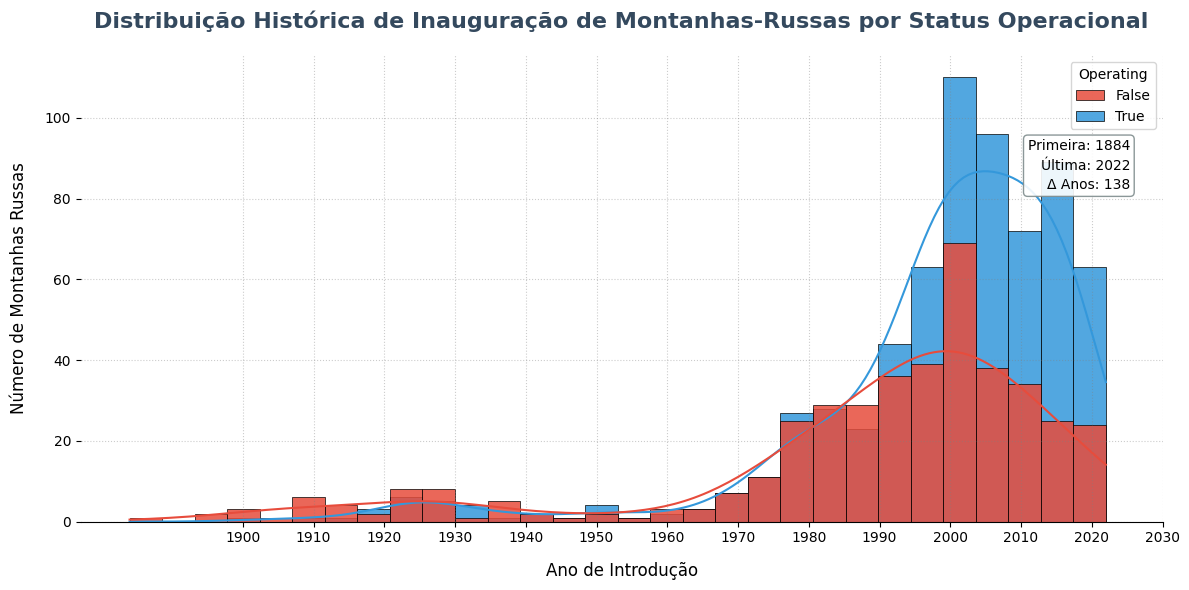

In [25]:
# @title Separação entre 'Operanting' ou não

operating_percentage = coaster['Operating'].value_counts(normalize=True) * 100
print(f"Percentual em operação: {operating_percentage}")

plt.figure(figsize=(12, 6))

# Histograma com hue para diferenciar True/False
ax = sns.histplot(
    data=coaster,
    x='year_introduced',
    hue='Operating',            # Coluna booleana que define a cor
    bins=30,
    palette={True: '#3498db', False: '#e74c3c'},  # Duas cores: para True e para False
    # palette={True: '#2ecc71', False: '#e74c3c'}
    edgecolor='black',
    alpha=0.85,
    kde=True,                   # Exibir curvas de densidade
    line_kws={'lw': 1.5, 'color': '#2c3e50'},
    linewidth=0.5
    )

# Média e Mediana
mean_year = coaster["year_introduced"].mean()
median_year = coaster["year_introduced"].median()

# ax.axvline(mean_year, color='#e74c3c', ls='--', lw=2,
#           label=f'Média: {mean_year:.1f}')
# ax.axvline(median_year, color='#2ecc71', ls='-.', lw=2,
#           label=f'Mediana: {median_year:.0f}')

# Customização
ax.set_title('Distribuição Histórica de Inauguração de Montanhas-Russas por Status Operacional',
             fontsize=16, pad=20, fontweight='bold', color='#34495e')
ax.set_xlabel('Ano de Introdução', fontsize=12, labelpad=12)
ax.set_ylabel('Número de Montanhas Russas', fontsize=12, labelpad=12)
ax.grid(True, linestyle=':', color='gray', alpha=0.4)

# Bloco informativo temporal
stats_text = (f"Primeira: {coaster['year_introduced'].min()}\n"
              f"Última: {coaster['year_introduced'].max()}\n"
              f"Δ Anos: {coaster['year_introduced'].max() - coaster['year_introduced'].min()}")
ax.text(0.97, 0.82, stats_text, transform=ax.transAxes,
        ha='right', va='top', fontsize=10, linespacing=1.5,
        bbox=dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='#7f8c8d'))

# ax.legend(loc='upper left', frameon=True, shadow=True)
sns.despine(left=True, right=True, top=True)
plt.xticks(range(1900, 2031, 10))
plt.tight_layout()
plt.show()


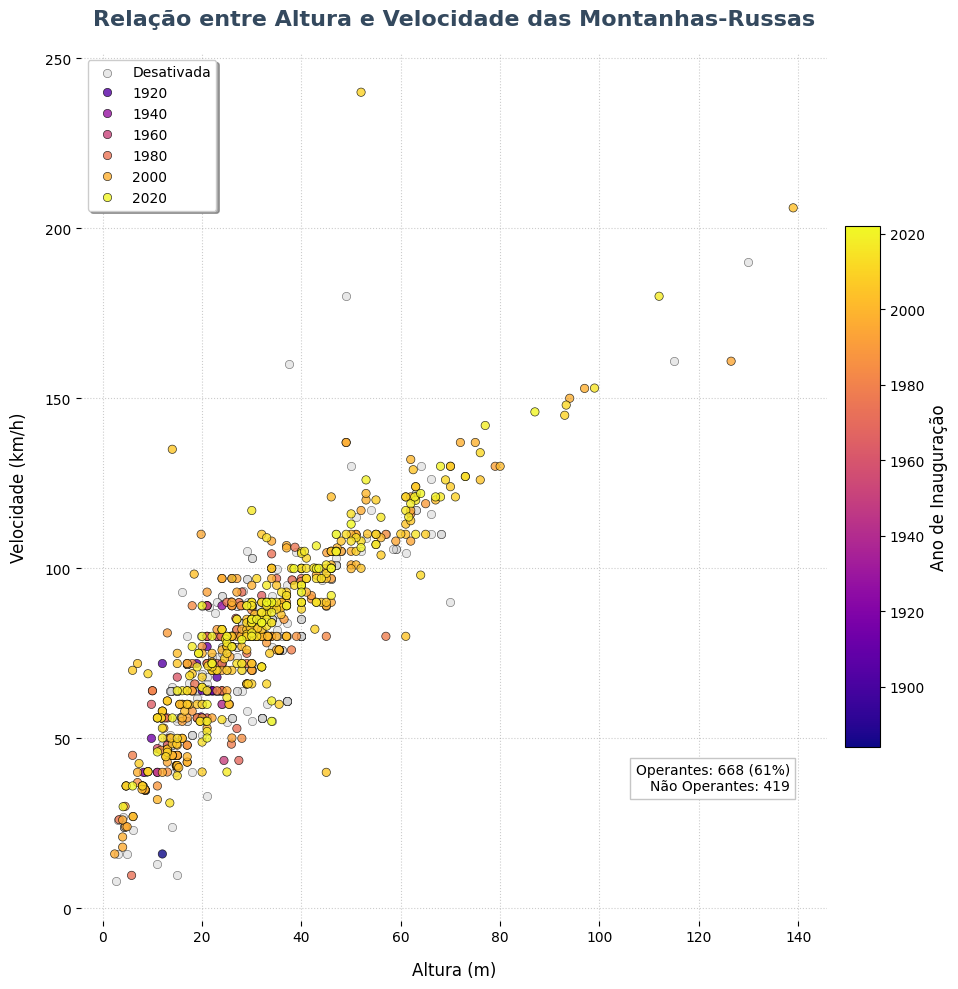

In [26]:
# @title Relação entre Altura e Velocidade das Montanhas-Russas e Status de Operação
fig, ax = plt.subplots(figsize=(10, 10))

# Plot das montanhas-russas desativadas (False) em cinza
sns.scatterplot(
    x="Height_mt",
    y="Speed_km/h",
    data=coaster[coaster["Operating"] == False],
    color="lightgray",
    edgecolor="black",
    alpha=0.5,
    ax=ax,
    label="Desativada"
)

# Plot das montanhas-russas em operação (True), coloridas pelo ano de inauguração
scatter = sns.scatterplot(
    x="Height_mt",
    y="Speed_km/h",
    data=coaster[coaster["Operating"] == True],
    hue="year_introduced",
    palette="plasma",       # Opções de colormap, ex: 'viridis', 'plasma', 'cividis' etc.
    edgecolor="black",
    alpha=0.8,
    ax=ax,
    legend='auto'
)

# Título e rótulos
ax.set_title("Relação entre Altura e Velocidade das Montanhas-Russas",
             fontsize=16, pad=20, fontweight='bold', color='#34495e')
ax.set_xlabel("Altura (m)", fontsize=12, labelpad=12)
ax.set_ylabel("Velocidade (km/h)", fontsize=12, labelpad=12)
ax.grid(True, linestyle=':', color='gray', alpha=0.4)

# Colorbar gradiente para o 'year_introduced'
norm = plt.Normalize(coaster["year_introduced"].min(), coaster["year_introduced"].max())
sm = plt.cm.ScalarMappable(cmap="plasma", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, pad=0.02, shrink=0.6, aspect=15)  # Redução de tamanho
cbar.set_label("Ano de Inauguração", fontsize=12)

# Anotações estatísticas
stats_text = (f"Operantes: {coaster['Operating'].sum()} ({coaster['Operating'].mean():.0%})\n"
             f"Não Operantes: {len(coaster) - coaster['Operating'].sum()}")
plt.text(0.95, 0.15, stats_text, transform=plt.gca().transAxes,
        ha='right', fontsize=10,
        bbox=dict(facecolor='white', alpha=0.9, edgecolor='silver'))

# Plotagem
sns.despine(left=True, bottom=True)
plt.legend(frameon=True, shadow=True)
plt.tight_layout()
plt.show()

In [27]:
# @title Localização da Montanhas Russas

fig = px.scatter_geo(
    coaster,
    lat="latitude",
    lon="longitude",
    color="Type_Main",
    symbol="Operating",
    hover_data=["Operating"],
    width=1200,
    height=700,
    title="Localização das Montanhas Russas - Rollercoaster Dataset"
)

fig.update_layout(legend_title_text="Tipo (Type_Main) e Operação")
fig.show()
